In [10]:
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import numpy as np

# Usando PIL, MATPLOTLIB e NUMPY

Image format:  JPEG 
Image Size:  (300, 168) 
Image mode:  RGB


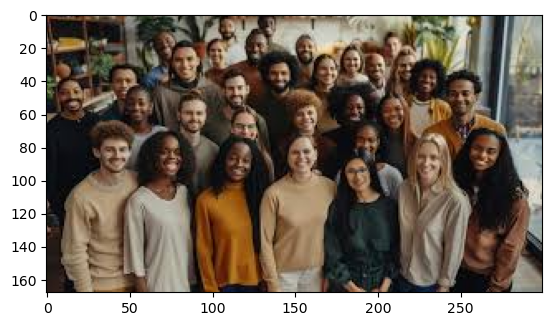

In [11]:

#importando a imagem
image = Image.open("images.jpeg")
plt.imshow(image)


#propriedades da image
print("Image format: ", image.format, "\nImage Size: ", image.size, "\nImage mode: ", image.mode)


### Escalas Cinza

Image mode:  L


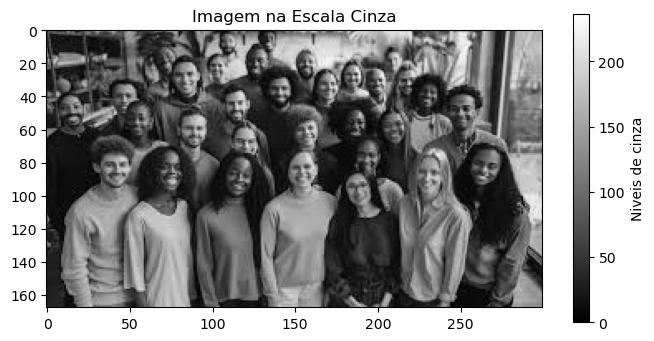

In [ ]:
image_cinza = ImageOps.grayscale(image)
print("Image mode: ", image_cinza.mode)

plt.figure(figsize=(8,4))
plot = plt.imshow(image_cinza, cmap='gray') #é necessario usar o cmap por conta do padrao Viridis que deixa com tons roxos-amarelo
plt.colorbar(plot, label="Niveis de cinza")
plt.title("Imagem na Escala Cinza")
plt.axis()
plt.show()

#salvando a imagem
image_cinza.save("image_cinza.jpg")

### Quantizando uma imagem



(-0.5, 299.5, 167.5, -0.5)

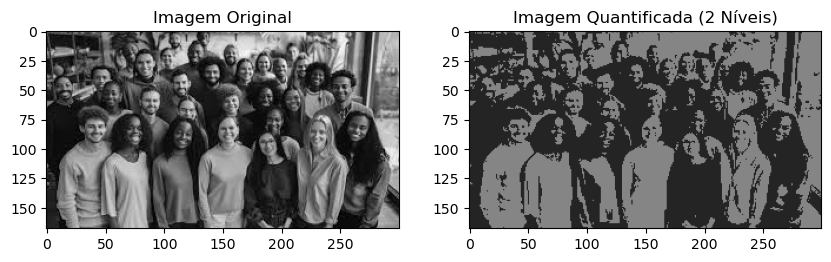

In [ ]:
quant_image = image_cinza.quantize(2)
# Exibir a imagem original e a imagem quantificada lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10,10))

axes[0].imshow(image_cinza, cmap='gray')
axes[0].set_title("Imagem Original")
axes[0].axis()

axes[1].imshow(quant_image, cmap='gray')
axes[1].set_title("Imagem Quantificada (2 Níveis)")
axes[1].axis()


### Testando as escalas do rgb

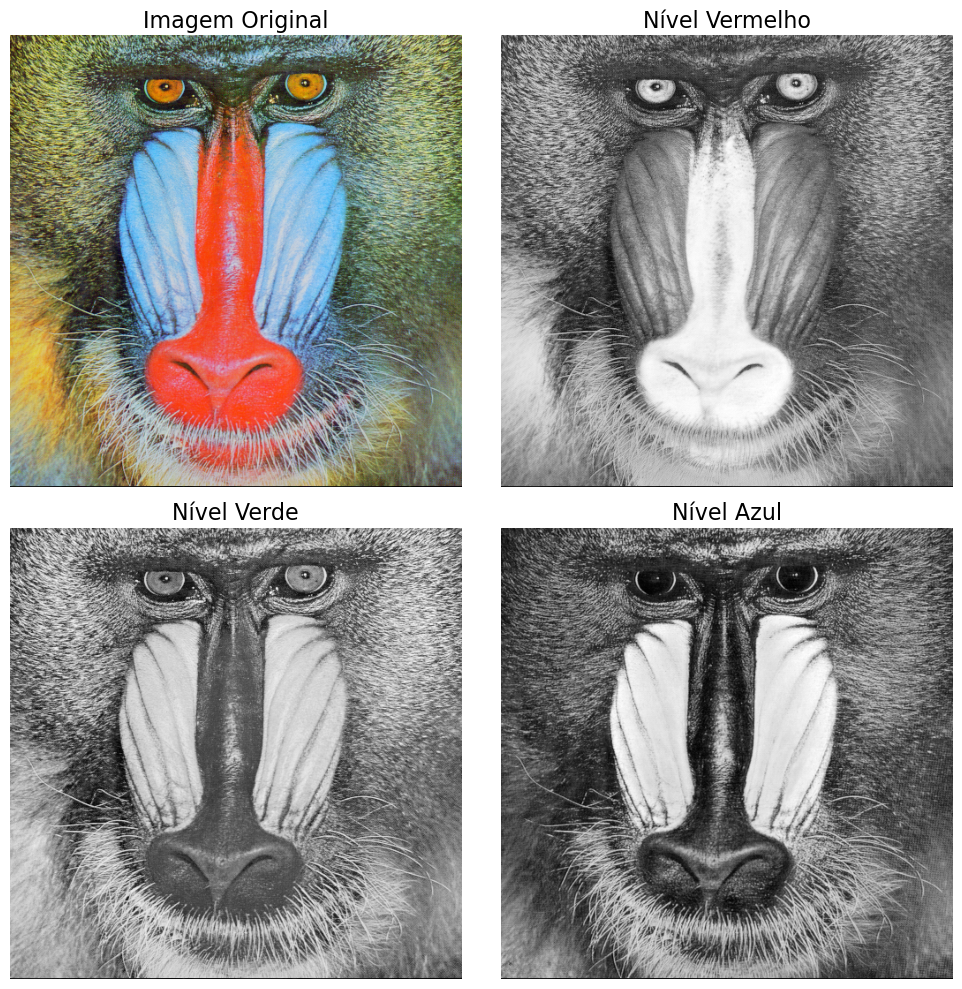

In [ ]:
babuino = Image.open("baboon.png")

verm, verde, azul = babuino.split()

fig, axes = plt.subplots(2, 2, figsize=(10,10))
# Imagem original
axes[0, 0].imshow(babuino)
axes[0, 0].set_title("Imagem Original", fontsize=16)
axes[0, 0].axis('off')  # Desativa os eixos

# Canal Vermelho
axes[0, 1].imshow(verm, cmap='gray')
axes[0, 1].set_title("Nível Vermelho", fontsize=16)
axes[0, 1].axis('off')

# Canal Verde
axes[1, 0].imshow(verde, cmap='gray')
axes[1, 0].set_title("Nível Verde", fontsize=16)
axes[1, 0].axis('off')

# Canal Azul
axes[1, 1].imshow(azul, cmap='gray')
axes[1, 1].set_title("Nível Azul", fontsize=16)
axes[1, 1].axis('off')



# Ajustar o layout
plt.tight_layout()
plt.show()

Nota: 1(Branco) é o nivel mais intenso e 0(preto) menos intenso

### Separando canais via numpy e PIL


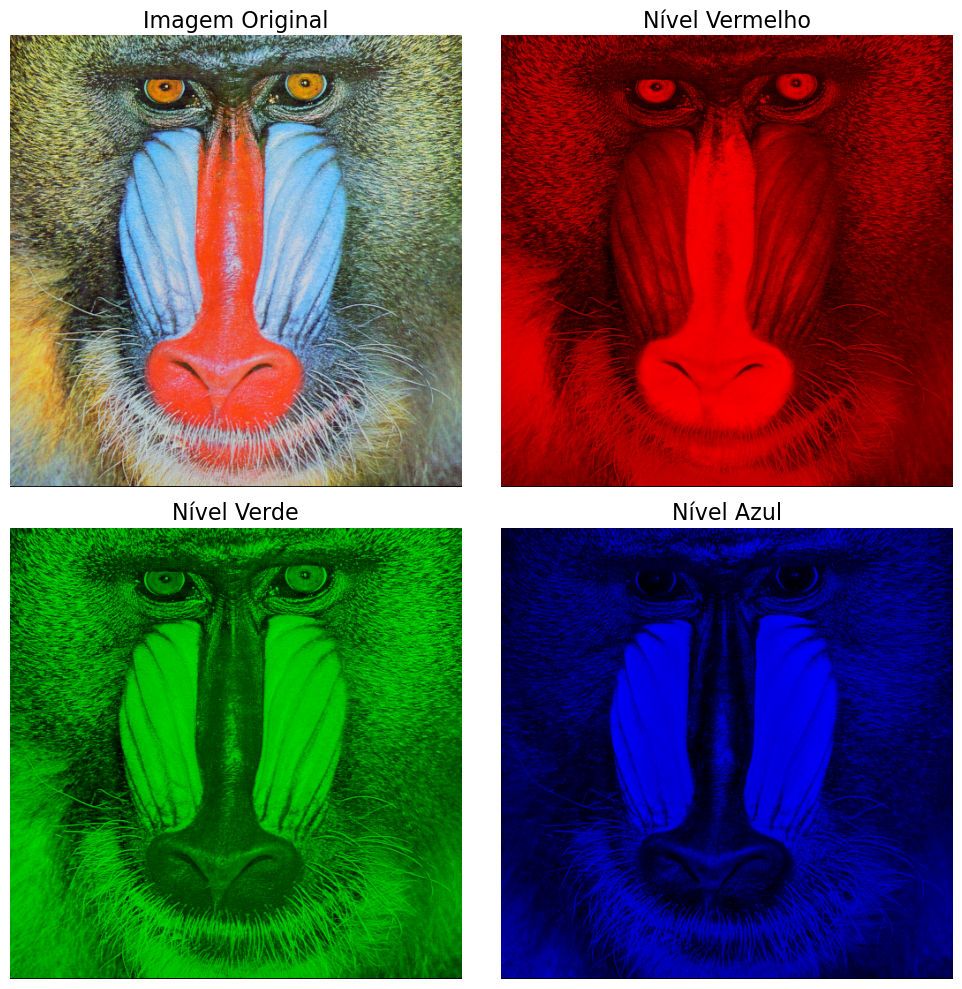

In [20]:
vetor_baboon = np.array(babuino)
red_baboon = vetor_baboon.copy()
blue_baboon = vetor_baboon.copy()
green_baboon = vetor_baboon.copy()

#zerando os canais azul e verde da imagem
red_baboon[:,:,1] = 0
red_baboon[:,:,2] = 0


#zerando os canais azul e vermelho da imagem
green_baboon[:,:,0] = 0
green_baboon[:,:,2] = 0


#zerando os canais azul e vermelho da imagem
blue_baboon[:,:,0] = 0
blue_baboon[:,:,1] = 0

fig, axes = plt.subplots(2, 2, figsize=(10,10))
# Imagem original
axes[0, 0].imshow(babuino)
axes[0, 0].set_title("Imagem Original", fontsize=16)
axes[0, 0].axis('off')  # Desativa os eixos

# Canal Vermelho
axes[0, 1].imshow(red_baboon, cmap='gray')
axes[0, 1].set_title("Nível Vermelho", fontsize=16)
axes[0, 1].axis('off')

# Canal Verde
axes[1, 0].imshow(green_baboon, cmap='gray')
axes[1, 0].set_title("Nível Verde", fontsize=16)
axes[1, 0].axis('off')

# Canal Azul
axes[1, 1].imshow(blue_baboon, cmap='gray')
axes[1, 1].set_title("Nível Azul", fontsize=16)
axes[1, 1].axis('off')

# Ajustar o layout
plt.tight_layout()
plt.show()


# Utilizando o Open Cv

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
import numpy as np
import cv2

O formato da matris é  (338, 1110, 3)
Imprimindo a imagem a partir da sua matriz numerica: 


libpng warning: iCCP: known incorrect sRGB profile


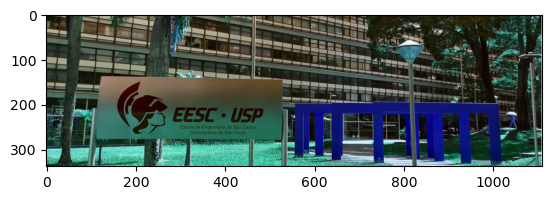

Usando a função cvtcolor para transformar as cores bgr -> rgb


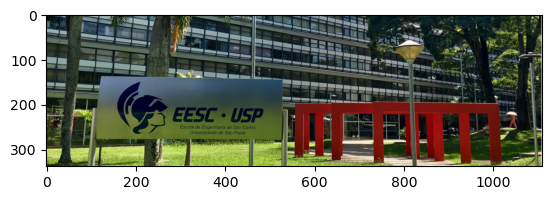

Utilizando a matriz para obter uma imagem em tons de cinza


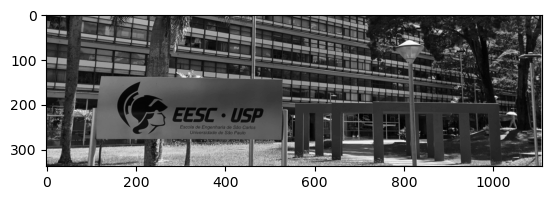

True

In [ ]:
#transformando a imagem em uma matriz
aux_img = Image.open("eesc.png")
vetor_image = np.array(aux_img)

#print(vetor_image)

#usando o opencv  para o mesmo
#tendo como resultado uma matriz numerico com valores de intensidade como tipos de dados n atrib de 8 bits
imagem = cv2.imread("eesc.png")

type(imagem)

print("O formato da matris é ", imagem.shape)
print("Imprimindo a imagem a partir da sua matriz numerica: ")
plt.imshow(imagem)
plt.show()

#usando a função cvtcolor para transformar as cores bgr -> rgb
print("Usando a função cvtcolor para transformar as cores bgr -> rgb")
new_image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)
plt.show()


#podemos usar essa função para transformar imagens na escala cinza
print("Utilizando a matriz para obter uma imagem em tons de cinza")
new_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(new_gray, cmap='gray')
plt.show()

#salvando as infos
cv2.imwrite("eesc_gray_cv.jpg", new_gray)



libpng warning: iCCP: known incorrect sRGB profile


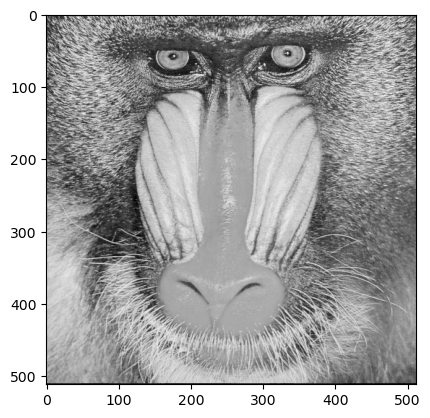

In [ ]:
#carregando imagens cinzas
im_gray = cv2.imread("baboon.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(im_gray, cmap='gray')

### Separando a imagem em canais de azul,verde e vermelho


libpng warning: iCCP: known incorrect sRGB profile


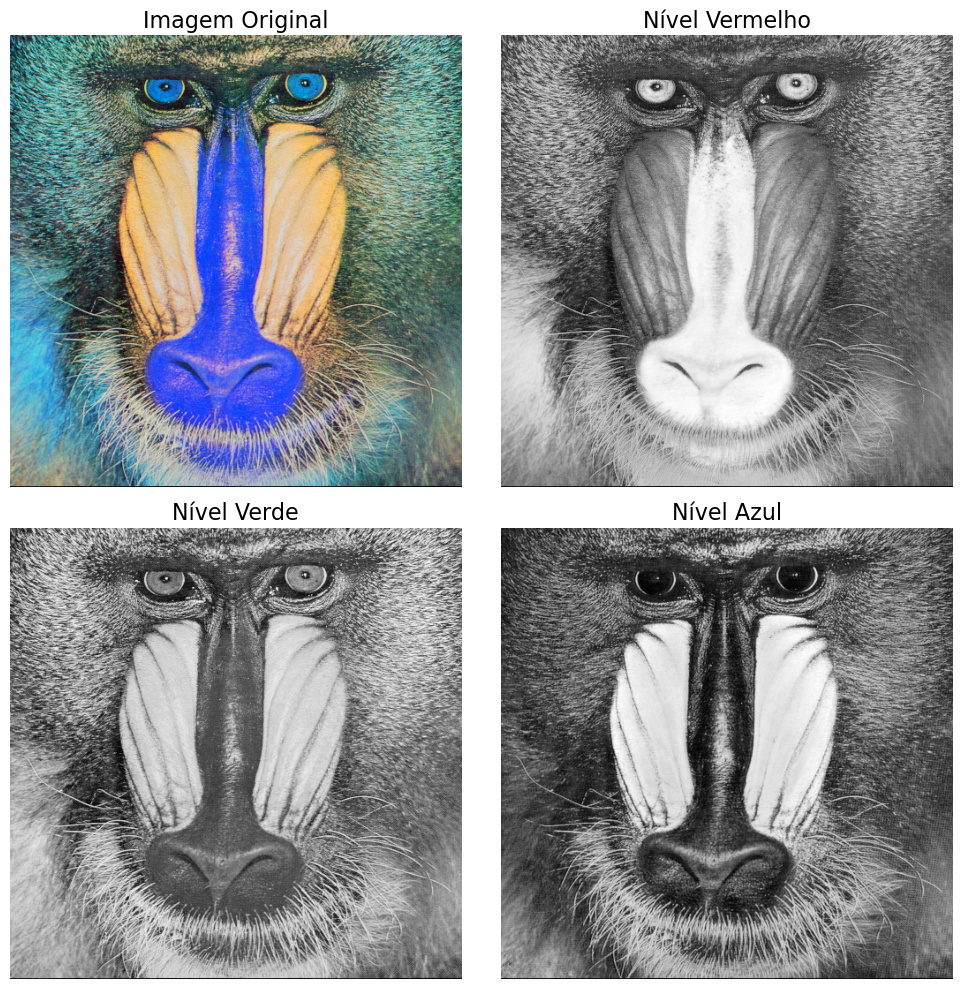

In [ ]:
#fatiando a imagem em azul,verde e vermelho
baboon = cv2.imread('baboon.png')
#uma matrix 3x3 
blue, green, red = baboon[:,:,0],baboon[:,:,1],baboon[:,:,2]

fig, axes = plt.subplots(2, 2, figsize=(10,10))
# Imagem original
axes[0, 0].imshow(baboon)
axes[0, 0].set_title("Imagem Original", fontsize=16)
axes[0, 0].axis('off')  # Desativa os eixos

# Canal Vermelho
axes[0, 1].imshow(red, cmap='gray')
axes[0, 1].set_title("Nível Vermelho", fontsize=16)
axes[0, 1].axis('off')

# Canal Verde
axes[1, 0].imshow(green, cmap='gray')
axes[1, 0].set_title("Nível Verde", fontsize=16)
axes[1, 0].axis('off')

# Canal Azul
axes[1, 1].imshow(blue, cmap='gray')
axes[1, 1].set_title("Nível Azul", fontsize=16)
axes[1, 1].axis('off')

# Ajustar o layout
plt.tight_layout()
plt.show()
